In [42]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

In [1]:
import t2ebm

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
# Load dataset
training = pd.read_csv("data/train.csv")
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:

test = pd.read_csv("data/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Data Analysis

In [6]:
training.select_dtypes(include = object).head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [7]:
training.loc[:,"Deck"] = training["Cabin"].str.split("/").str.get(0).copy()
training.loc[:,"Cabin_num"] = training["Cabin"].str.split("/").str.get(1).copy()
training.loc[:,"Side"] = training["Cabin"].str.split("/").str.get(2).copy()
training.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [8]:
# Separate Categorical and Numerical data for exploration
training_obj = training[['Transported','HomePlanet','CryoSleep','Destination','VIP','Deck','Cabin_num','Side']].copy()
training_obj.head()


,Transported,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_num,Side
0,False,Europa,False,TRAPPIST-1e,False,B,0,P
1,True,Earth,False,TRAPPIST-1e,False,F,0,S
2,False,Europa,False,TRAPPIST-1e,True,A,0,S
3,False,Europa,False,TRAPPIST-1e,False,A,0,S
4,True,Earth,False,TRAPPIST-1e,False,F,1,S


### distributions for all object variables

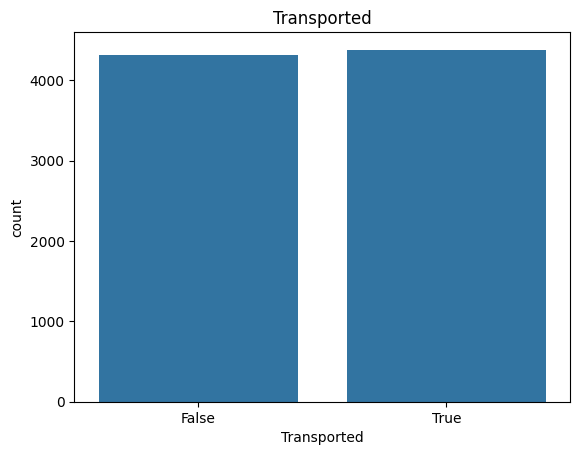

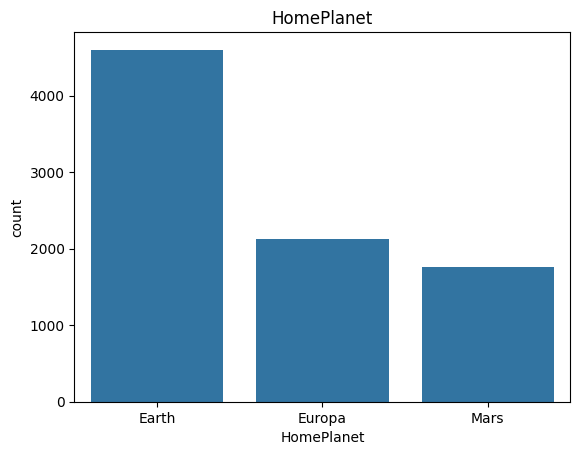

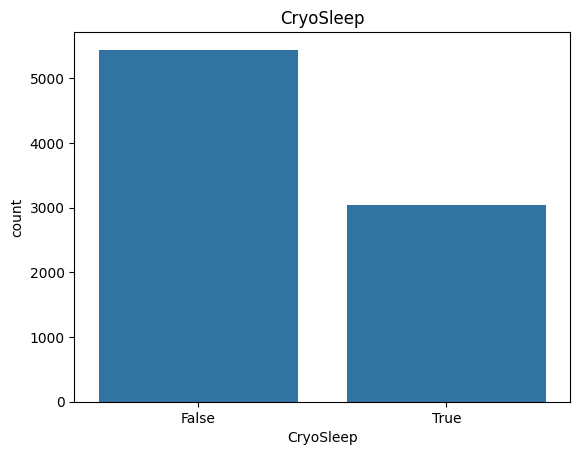

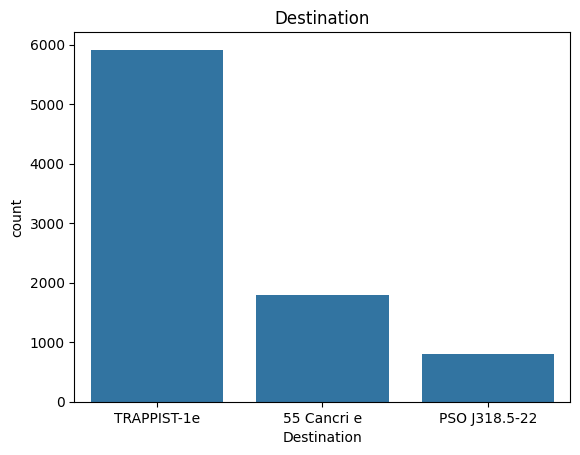

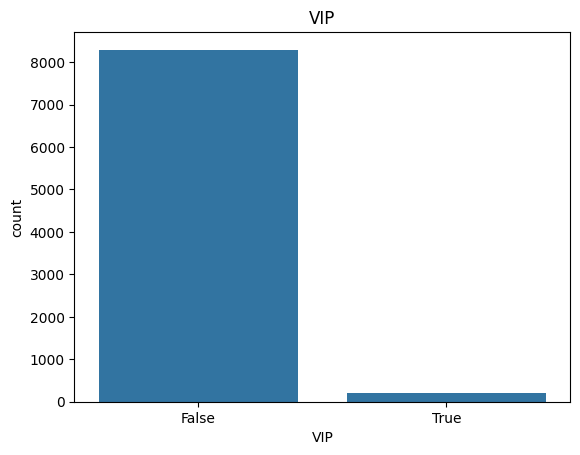

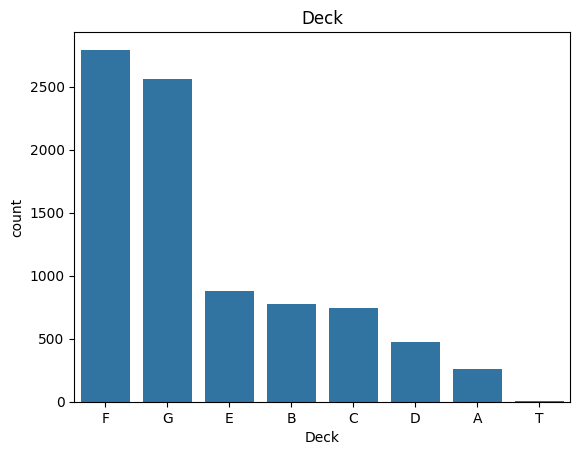

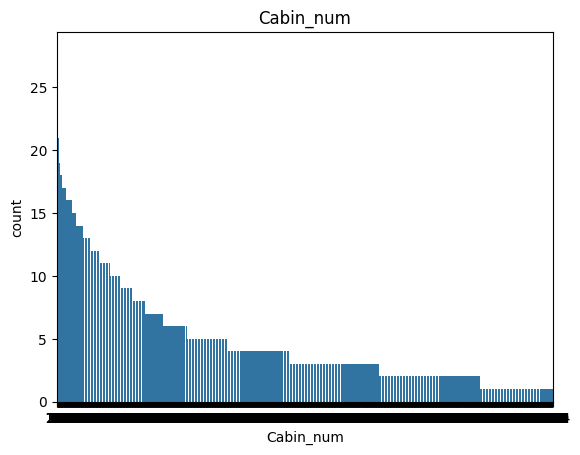

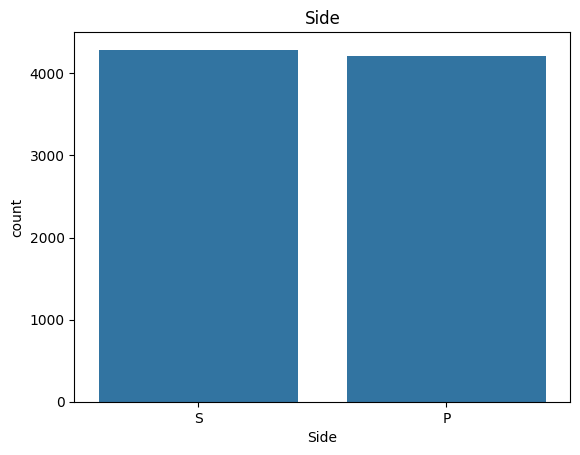

In [9]:
from matplotlib import pyplot as plt


for i in training_obj.columns:
    sns.barplot(x= training_obj[i].value_counts().index, y= training_obj[i].value_counts()).set_title(i)
    plt.show()

In [10]:
training_num = training.select_dtypes(include=float).copy()
training_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


### distributions for all numeric variables

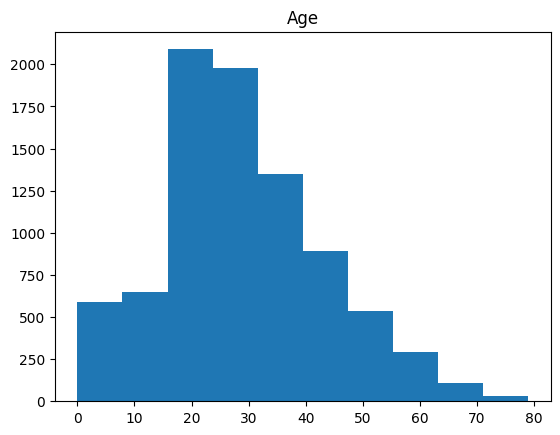

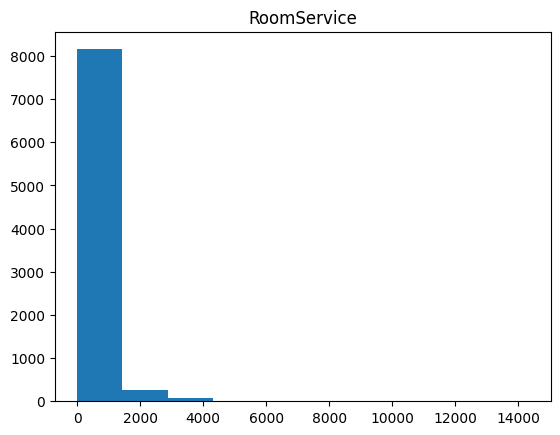

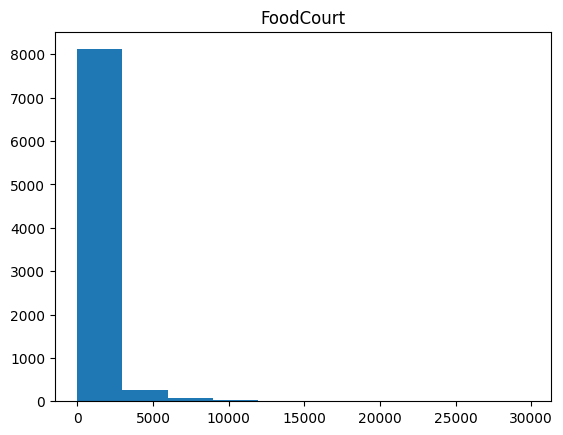

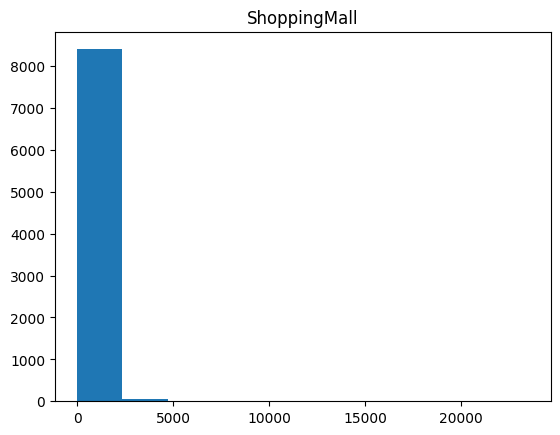

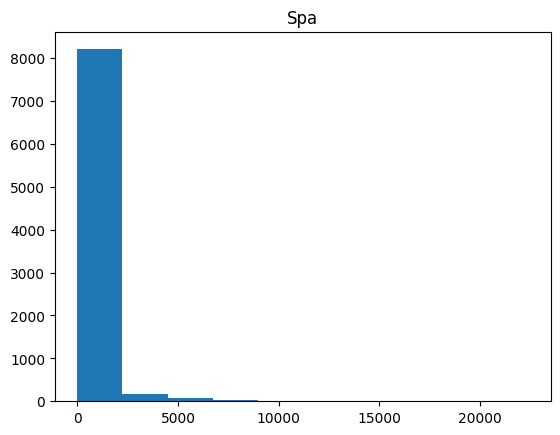

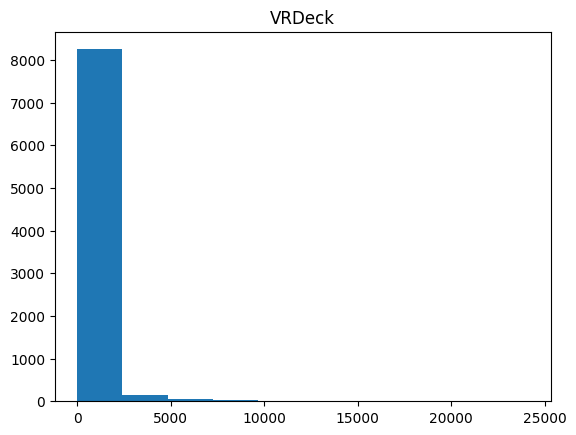

In [11]:

import matplotlib.pyplot as plt

for i in training_num.columns:
    plt.hist(training_num[i])
    plt.title(i)
    plt.show()

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


<Axes: >

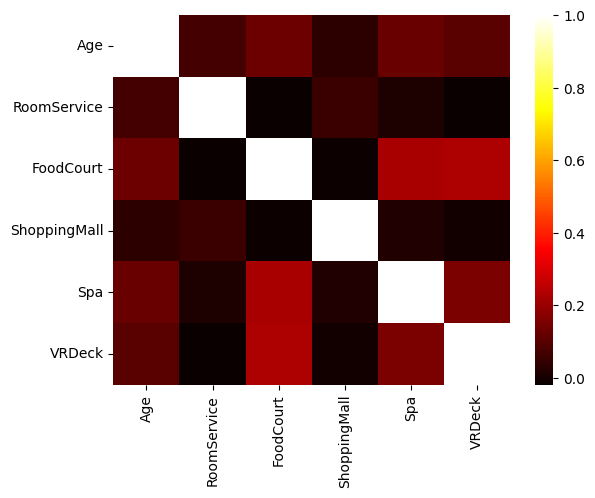

In [12]:
print(training_num.corr())
sns.heatmap(training_num.corr(),cmap = 'hot')

### Another analysis

In [13]:
# Comparing survival and each of these categorical variables
# 'HomePlanet','CryoSleep','Destination','VIP','Cabin_deck'
print(pd.pivot_table(training, index = 'Transported', columns = 'HomePlanet',
                     values = 'PassengerId', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Transported', columns = 'CryoSleep',
                     values = 'PassengerId', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Transported', columns = 'Destination',
                     values = 'PassengerId', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Transported', columns = 'VIP',
                     values = 'PassengerId', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Transported', columns = 'Deck',
                     values = 'PassengerId', aggfunc = 'count'))
print()

HomePlanet   Earth  Europa  Mars
Transported                     
False         2651     727   839
True          1951    1404   920

CryoSleep    False  True 
Transported              
False         3650    554
True          1789   2483

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                702            395         3128
True                1098            401         2787

VIP          False  True 
Transported              
False         4093    123
True          4198     76

Deck           A    B    C    D    E     F     G  T
Transported                                        
False        129  207  239  271  563  1565  1238  4
True         127  572  508  207  313  1229  1321  1



## Analysis Home Planet for dependent variable

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
#   function to generate synthetic target based on HomePlanet
def generate_target(home_planet):
    if home_planet == 'Europa':
        return np.random.normal(0.5678, 0.0562)  # Mean of 0.5678, std dev based on CI (confidence interval)
    elif home_planet == 'Earth':
        return np.random.normal(-0.3246, 0.0294)  # Mean of -0.3246, std dev based on CI
    elif home_planet == 'Mars':
        return np.random.normal(0.1713, 0.0458)  # Mean of 0.1713, std dev based on CI
    else:
        return np.random.normal(0, 1)  # Default case


In [16]:
# Generate synthetic target
training['SyntheticTarget'] = training['HomePlanet'].apply(generate_target)

# Select features for the model
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Prepare X and y
X = training[features]
y = training['SyntheticTarget']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6954, 13)
Testing set shape: (1739, 13)


In [18]:
# Display the first few rows of the training data
print("\nFirst few rows of training data:")
print(X_train.head())


First few rows of training data:
     HomePlanet CryoSleep  Destination    VIP Deck Cabin_num Side   Age  \
2333      Earth     False  TRAPPIST-1e  False  NaN       NaN  NaN  28.0   
2589      Earth     False  TRAPPIST-1e  False    F       575    P  17.0   
8302     Europa      True  55 Cancri e  False    C       329    S  28.0   
8177       Mars     False  TRAPPIST-1e  False    F      1800    P  20.0   
500      Europa      True  55 Cancri e  False    C        18    P  36.0   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  
2333          0.0       55.0           0.0  656.0     0.0  
2589          0.0     1195.0          31.0    0.0     0.0  
8302          0.0        0.0           0.0    0.0     0.0  
8177          NaN        2.0         289.0  976.0     0.0  
500           0.0        0.0           0.0    0.0     0.0  


In [19]:
# Display summary statistics of the synthetic target
print("\nSummary statistics of the synthetic target:")
print(y_train.describe())



Summary statistics of the synthetic target:
count    6954.000000
mean        0.000017
std         0.404382
min        -2.851438
25%        -0.328175
50%        -0.280657
75%         0.434589
max         2.566092
Name: SyntheticTarget, dtype: float64


In [20]:

# Check the mean effect for each HomePlanet category
print("\nMean effect for each HomePlanet category:")
print(y_train.groupby(X_train['HomePlanet']).mean())


Mean effect for each HomePlanet category:
HomePlanet
Earth    -0.324772
Europa    0.567950
Mars      0.171614
Name: SyntheticTarget, dtype: float64


## EBM based on previous case

In [21]:
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [22]:
# Function to generate synthetic target based on HomePlanet
def generate_target(home_planet):
    if home_planet == 'Europa':
        return np.random.normal(0.5678, 0.0562)
    elif home_planet == 'Earth':
        return np.random.normal(-0.3246, 0.0294)
    elif home_planet == 'Mars':
        return np.random.normal(0.1713, 0.0458)
    else:
        return np.random.normal(0, 1)


In [23]:
"""
To implement the Explainable Boosting Classifier (EBM) using the data we prepared, we'll need to make a few adjustments. The EBM is typically used for classification tasks, but our synthetic target is continuous. We'll need to convert this to a binary classification problem. 
"""
# Generate synthetic target
training['SyntheticTarget'] = training['HomePlanet'].apply(generate_target)

# Convert continuous target to binary (1 if positive, 0 if negative)
training['BinaryTarget'] = (training['SyntheticTarget'] > 0).astype(int)

# Select features for the model
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [24]:
# Prepare X and y
X = training[features]
y = training['BinaryTarget']

In [25]:
# Check the content of HomePlanet column
print("HomePlanet value counts:")
print(training['HomePlanet'].value_counts(dropna=False))

HomePlanet value counts:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64


In [26]:
# Handle missing values for HomePlanet
categorical_imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(categorical_imputer.fit_transform(X), columns=X.columns)

# Encode HomePlanet
le = LabelEncoder()
X['HomePlanet'] = le.fit_transform(X['HomePlanet'])


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create and train the EBM
feature_names = ['HomePlanet']
ebm = ExplainableBoostingClassifier(feature_names=feature_names, random_state=42)
ebm.fit(X_train, y_train)


ExplainableBoostingClassifier(feature_names=['HomePlanet'])

In [29]:
# Print model performance
print("Train accuracy:", ebm.score(X_train, y_train))
print("Test accuracy:", ebm.score(X_test, y_test))


Train accuracy: 0.9870578084555651
Test accuracy: 0.99252443933295


In [30]:
# Get global explanation
global_explanation = ebm.explain_global()

# Print feature importance
print("\nFeature Importance:")
importance = global_explanation.data()['scores'][0]
print(f"HomePlanet: {importance:.4f}")


Feature Importance:
HomePlanet: 7.2121


In [31]:
# Explore global effects of HomePlanet
print("\nGlobal effects of HomePlanet:")
term_scores = ebm.term_scores_[0]
print(term_scores)
# Get unique categories
unique_categories = le.classes_
print("Unique categories:", unique_categories)


Global effects of HomePlanet:
[ 0.         -6.49814672 11.23455815  4.27503964  0.        ]
Unique categories: ['Earth' 'Europa' 'Mars']


In [32]:
# Print global effects
for category, score in zip(unique_categories, term_scores):
    print(f"  {category}: {score:.4f}")


  Earth: 0.0000
  Europa: -6.4981
  Mars: 11.2346


Term scores shape: (5,)
Feature bounds shape: (2,)


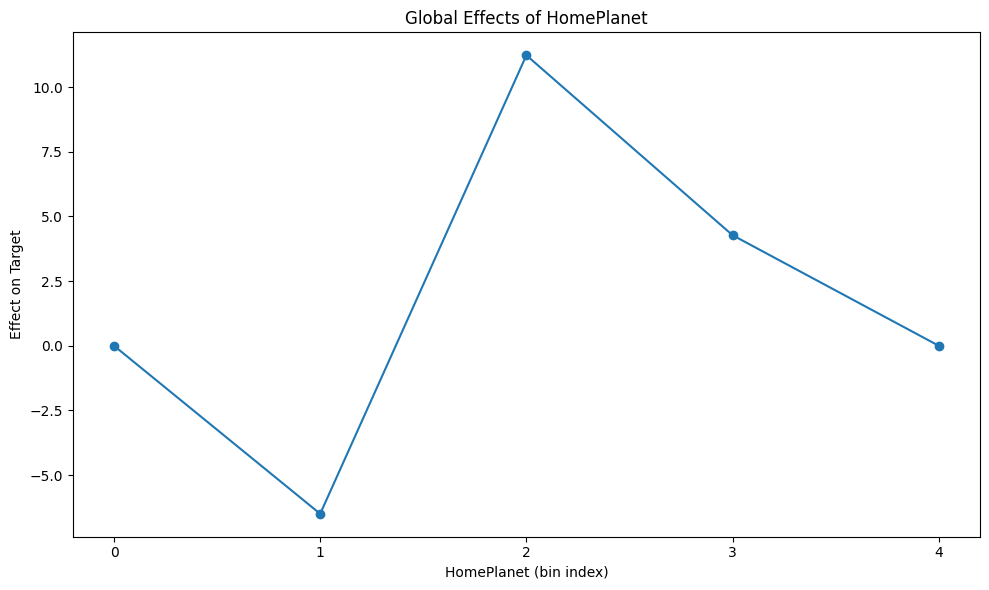


Global effects of HomePlanet:
  Earth: 0.0000
  Europa: -6.4981
  Mars: 11.2346
  Bin 3: 4.2750
  Bin 4: 0.0000


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Get the term scores and feature bounds
term_scores = ebm.term_scores_[0]
feature_bounds = ebm.feature_bounds_[0]

print("Term scores shape:", term_scores.shape)
print("Feature bounds shape:", feature_bounds.shape)

# Create x-axis values
x_values = np.arange(len(term_scores))

# Visualize the global effects
plt.figure(figsize=(10, 6))
plt.plot(x_values, term_scores, marker='o')
plt.title('Global Effects of HomePlanet')
plt.xlabel('HomePlanet (bin index)')
plt.ylabel('Effect on Target')

# If you want to show the original category names on the x-axis
if len(le.classes_) == len(term_scores):
    plt.xticks(x_values, le.classes_, rotation=45)
else:
    plt.xticks(x_values)

plt.tight_layout()
plt.show()

# Print global effects
print("\nGlobal effects of HomePlanet:")
for i, score in enumerate(term_scores):
    if i < len(le.classes_):
        category = le.classes_[i]
    else:
        category = f"Bin {i}"
    print(f"  {category}: {score:.4f}")

# t2ebm

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import t2ebm
from textwrap import wrap

In [35]:
# Get the term scores and feature bounds
term_scores = ebm.term_scores_[0]
feature_bounds = ebm.feature_bounds_[0]

In [36]:
# Create x-axis values
x_values = np.arange(len(term_scores))


Text(0, 0.5, 'Effect on Target')

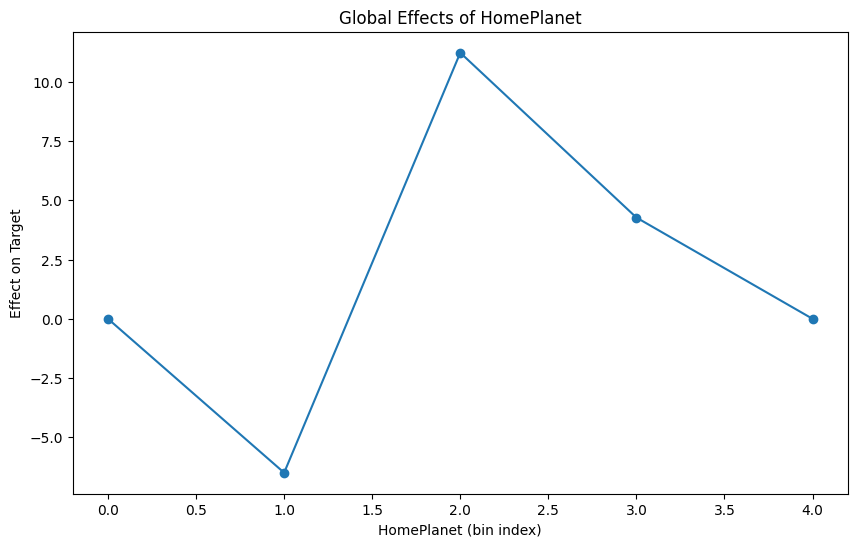

In [37]:
# Visualize the global effects
plt.figure(figsize=(10, 6))
plt.plot(x_values, term_scores, marker='o')
plt.title('Global Effects of HomePlanet')
plt.xlabel('HomePlanet (bin index)')
plt.ylabel('Effect on Target')

In [38]:
# Print global effects
print("\nGlobal effects of HomePlanet:")
for i, score in enumerate(term_scores):
    if i < len(le.classes_):
        category = le.classes_[i]
    else:
        category = f"Bin {i}"
    print(f"  {category}: {score:.4f}")



Global effects of HomePlanet:
  Earth: 0.0000
  Europa: -6.4981
  Mars: 11.2346
  Bin 3: 4.2750
  Bin 4: 0.0000


In [39]:
t2ebm.describe_graph('gpt-4o', ebm, 0)

'The "HomePlanet" feature shows a non-linear influence on the prediction across three intervals. In the (0.0, 0.5) interval, the feature has a negative effect with a mean value of -6.5, indicating a decrease in predicted outcomes. Surprisingly, in the (0.5, 1.5) interval, there is a significant positive shift, with a mean of 11.23, suggesting a strong increase in predictions. The effect moderates to a smaller positive impact in the (1.5, 2.0) interval, with a mean of 4.28. This stark transition from negative to positive between the first two intervals is notable. Confidence intervals are relatively narrow, indicating reasonable certainty in these estimates. The pattern may reflect inherent non-linearity or specific data distribution characteristics.'

In [40]:
description_ai=t2ebm.describe_graph('gpt-4o-mini', ebm, 0)
# Wrap and format the description
wrapped_description = '\n'.join(wrap(description_ai, width=80))
formatted_description = f"\033[3m\033[94m{wrapped_description}\033[0m"

print("\nDescription of Global Effects of Home Planet using EBM:")
print(formatted_description)


Description of Global Effects of Home Planet using EBM:
The graph illustrates the relationship of the continuous feature "HomePlanet"
with the predicted mean values across three intervals. Notably, the mean value
in the interval (0.0, 0.5) is -6.5, indicating a surprising negative association
at lower values. This is followed by a dramatic increase to 11.23 in the
interval (0.5, 1.5), suggesting a strong positive threshold effect that may
indicate improved conditions or characteristics associated with this range.
However, the mean value decreases again to 4.28 in the interval (1.5, 2.0),
which is counterintuitive as one might expect higher values to correlate with
better outcomes. This decline could reflect diminishing returns or the emergence
of negative factors at higher "HomePlanet" values. The confidence intervals
provide additional context, indicating variability in the predictions,
particularly highlighting the uncertainty at the extremes. Overall, the graph
reveals a complex an

## Another Example of EBM using Age Graph

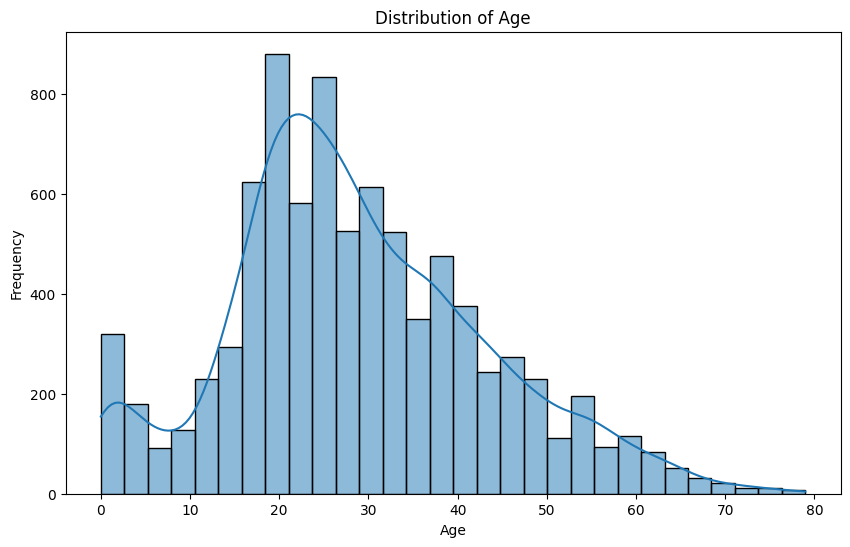

INFO: The graph of feature Age_feature was simplified by 0.7%.

Description of Age distribution using EBM:
The graph of the "Age_feature" reveals a complex relationship between age and
the predicted outcome, exhibiting predominantly negative mean values for younger
age groups (0 to 17 years), which may reflect socio-economic challenges faced by
this demographic. A surprising dip in mean values is observed around ages 30.5
to 34.5, suggesting transitional difficulties during early adulthood that may
counter expectations of stability. As individuals enter middle age (40 to 50
years), the mean values show fluctuations, potentially indicating the pressures
of career and personal life changes. In contrast, a notable upward trend in
predicted values emerges for older age groups (50 years and above), which is
counterintuitive as one might expect declining outcomes due to health or
economic factors. This trend suggests that older individuals may experience
increased stability or satisfaction, 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret.glassbox import ExplainableBoostingClassifier
from textwrap import wrap

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=training_num['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Now, let's try to use EBM for the 'Age' feature
X_age = training_num[['Age']].dropna()
y_age= np.random.randint(0, 2, size=len(X_age))  # dummy target variable

# Create a new EBM instance specifically for Age
ebm_age = ExplainableBoostingClassifier(feature_names=['Age_feature'], random_state=42)
ebm_age.fit(X_age, y_age)

# Get description using t2ebm.describe_graph
description = t2ebm.describe_graph('gpt-4o-mini', ebm_age, 0)

# Wrap and format the description
wrapped_description = '\n'.join(wrap(description, width=80))
formatted_description = f"\033[3m\033[94m{wrapped_description}\033[0m"

print("\nDescription of Age distribution using EBM:")
print(formatted_description)